<a href="https://colab.research.google.com/github/qasim7860/brain-tumor-and-lung-cancer-code/blob/main/Antspy_skull_stripper_v2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
cd ~

/root


In [1]:
!pip install antspyx
!pip install medpy
!pip install SimpleITK
!pip install dicom2nifti 

     |████████████████████████████████| 300.4 MB 14 kB/s 
     |████████████████████████████████| 64 kB 2.3 MB/s 
     |████████████████████████████████| 151 kB 8.0 MB/s 
     |████████████████████████████████| 48.4 MB 29 kB/s 
  Created wheel for medpy: filename=MedPy-0.4.0-cp37-cp37m-linux_x86_64.whl size=754469 sha256=310211233710d5191398a8585c1ccb973cc2e256d0f9286f608b87899bf89808
  Stored in directory: /root/.cache/pip/wheels/b0/57/3a/da1183f22a6afb42e11138daa6a759de233fd977a984333602
Successfully built medpy
     |████████████████████████████████| 1.9 MB 9.9 MB/s 
  Created wheel for dicom2nifti: filename=dicom2nifti-2.3.0-py3-none-any.whl size=42933 sha256=d7382a2421ff36d207ed90667e22a4c016c0bb10a3909c1d3d9eb2a4255c0ff4
  Stored in directory: /root/.cache/pip/wheels/bf/ff/aa/f5b52fd2e9f9355a28a6f6f6994d721a13209387528b146db5
Successfully built dicom2nifti


In [2]:
import os
import ants
import dicom2nifti
import matplotlib.pyplot as plt
from medpy.io import load,save
import SimpleITK
from tqdm import tqdm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#dicom to nifti conversion 

In [ ]:
#dicom to nifti conversion 
def D2N(path,patient_name,mod,output_file):
  dicom2nifti.convert_directory(path, output_file, compression=True, reorient=True)
  print('done with : '+path)
# +'/'+patient_name+'_'+mod+'.nii' 

In [ ]:
# Extracting paths and conversion to nifti from dicom
data_dir ='/content/drive/My Drive/datasets/Very important Data/Anti-PD-1_MELANOMA'
patient_list = os.listdir(data_dir)
paths=[]
nifti='/content/drive/My Drive/nifti melanoma'
for patient in tqdm(patient_list):
  # os.mkdir('/content/drive/My Drive/nifti melanoma/'+patient)
  sub_dir= os.listdir(data_dir+'/'+patient)
  for entry in sub_dir:
    paths.append('/content/drive/My Drive/nifti melanoma/'+patient+'/'+entry)
    # os.mkdir('/content/drive/My Drive/nifti melanoma/'+patient+'/'+entry)
    # D2N(data_dir+'/'+patient+'/'+entry+'/'+'Ax T1',patient,'Ax T1','/content/drive/My Drive/nifti melanoma'+'/'+patient+'/'+entry)
    # D2N(data_dir+'/'+patient+'/'+entry+'/'+'Ax T1 C',patient,'Ax T1 C','/content/drive/My Drive/nifti melanoma'+'/'+patient+'/'+entry)
    # D2N(data_dir+'/'+patient+'/'+entry+'/'+'Ax T2',patient,'Ax T2','/content/drive/My Drive/nifti melanoma'+'/'+patient+'/'+entry)
    # D2N(data_dir+'/'+patient+'/'+entry+'/'+'Ax FLAIR',patient,'Ax FLAIR','/content/drive/My Drive/nifti melanoma'+'/'+patient+'/'+entry)
    # niftifile=os.listdir('/content/drive/My Drive/nifti melanoma/'+patient+'/'+entry)
    # for n in niftifile:
      # os.rename('/content/drive/My Drive/nifti melanoma/'+patient+'/'+entry+'/'+n,'/content/drive/My Drive/nifti melanoma/'+patient+'/'+entry+'/'+patient+n[1:])

100%|██████████| 20/20 [00:00<00:00, 1503.23it/s]


In [ ]:
print(len(paths))

28


In [ ]:
def preprocessing(data):
  out=ants.resample_image(data,(240,240,155), use_voxels=True, interp_type=1)
  ants.set_spacing(out,[1,1,1])
  # n4=ants.n4_bias_field_correction(out)
  return out


In [ ]:
i=0
for p in paths:
  print(p+' ',i)
  i=i+1

/content/drive/My Drive/nifti melanoma/PD-1-MELANOMA-00039/02-02-2007-MRI Brain WOW Contrast-39564  0
/content/drive/My Drive/nifti melanoma/PD-1-MELANOMA-00045/01-15-2007-MRI Brain WOW Contrast-38041  1
/content/drive/My Drive/nifti melanoma/PD-1-MELANOMA-00033/10-11-2006-MRI Brain WOW Contrast-72300  2
/content/drive/My Drive/nifti melanoma/PD-1-MELANOMA-00033/01-24-2007-MRI Brain WOW Contrast-24507  3
/content/drive/My Drive/nifti melanoma/PD-1-MELANOMA-00046/11-22-2006-MRI Brain WOW Contrast-57566  4
/content/drive/My Drive/nifti melanoma/PD-1-MELANOMA-00046/02-17-2007-MRI Brain WOW Contrast-26354  5
/content/drive/My Drive/nifti melanoma/PD-1-MELANOMA-00042/10-10-2006-MRI Brain WOW Contrast-41159  6
/content/drive/My Drive/nifti melanoma/PD-1-MELANOMA-00032/10-15-2006-MRI Brain WOW Contrast-54851  7
/content/drive/My Drive/nifti melanoma/PD-1-MELANOMA-00030/07-22-2006-MRI Brain WOW Contrast-28519  8
/content/drive/My Drive/nifti melanoma/PD-1-MELANOMA-00030/12-26-2006-MRI Brain WO

In [ ]:
for i in tqdm(range(24,len(paths))):
  p=os.listdir(paths[i])
  for x in p:
    f=ants.image_read(paths[i]+'/'+x)
    print(f)
    out=preprocessing(f)
    print(out)
    print('saving....')
    ants.image_write(out, paths[i]+'/Resampled_'+x, ri=False)
    print('saved to:'+ paths[i]+'/'+x)

  0%|          | 0/4 [00:00<?, ?it/s]

ANTsImage (RPI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (256, 256, 30)
	 Spacing    : (0.8594, 0.8594, 6.5)
	 Origin     : (-111.3632, 85.2023, -96.4352)
	 Direction  : [ 9.994e-01  3.440e-02 -1.000e-04  3.440e-02 -9.994e-01  4.100e-03
  0.000e+00  4.100e-03  1.000e+00]

ANTsImage (RPI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (240, 240, 155)
	 Spacing    : (1.0, 1.0, 1.0)
	 Origin     : (-111.3632, 85.2023, -96.4352)
	 Direction  : [ 9.994e-01  3.440e-02 -1.000e-04  3.440e-02 -9.994e-01  4.100e-03
  0.000e+00  4.100e-03  1.000e+00]

saving....
saved to:/content/drive/My Drive/nifti melanoma/PD-1-MELANOMA-00019/09-04-2006-MRI Brain WOW Contrast-63248/PD-1-MELANOMA-00019_ax_t1.nii.gz
ANTsImage (RPI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (256, 256, 30)
	 Spacing    : (0.8594, 0.8594, 6.5)
	 Origin     : (-111.3632, 85.2023, -96.4352)
	 Direction  : [ 9.994e-01  3.440e-02 -1.000e-04  3.440e-02 -9.994e-01  4.100e-03
  0.

 25%|██▌       | 1/4 [00:37<01:51, 37.29s/it]

ANTsImage (RPI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (240, 240, 155)
	 Spacing    : (1.0, 1.0, 1.0)
	 Origin     : (-111.3632, 85.2023, -96.4352)
	 Direction  : [ 9.994e-01  3.440e-02 -1.000e-04  3.440e-02 -9.994e-01  4.100e-03
  0.000e+00  4.100e-03  1.000e+00]

saving....
saved to:/content/drive/My Drive/nifti melanoma/PD-1-MELANOMA-00019/09-04-2006-MRI Brain WOW Contrast-63248/PD-1-MELANOMA-00019_ax_flair.nii.gz
ANTsImage (RPI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (256, 256, 26)
	 Spacing    : (0.8594, 0.8594, 6.5)
	 Origin     : (-118.7669, 86.4336, -51.5303)
	 Direction  : [ 9.999e-01 -6.000e-04  1.360e-02  2.000e-04 -9.986e-01 -5.250e-02
 -1.360e-02 -5.250e-02  9.985e-01]

ANTsImage (RPI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (240, 240, 155)
	 Spacing    : (1.0, 1.0, 1.0)
	 Origin     : (-118.7669, 86.4336, -51.5303)
	 Direction  : [ 9.999e-01 -6.000e-04  1.360e-02  2.000e-04 -9.986e-01 -5.250e-02
 -1.36

 50%|█████     | 2/4 [01:15<01:15, 37.51s/it]

saved to:/content/drive/My Drive/nifti melanoma/PD-1-MELANOMA-00021/12-25-2006-MRI Brain WOW Contrast-92435/PD-1-MELANOMA-00021_ax_t1_c_fs.nii.gz
ANTsImage (RPI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (256, 256, 24)
	 Spacing    : (0.8594, 0.8594, 6.5)
	 Origin     : (-119.6053, 67.5403, -77.8627)
	 Direction  : [ 0.9971  0.0758 -0.0072  0.0761 -0.9926  0.0949  0.      0.0952  0.9955]

ANTsImage (RPI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (240, 240, 155)
	 Spacing    : (1.0, 1.0, 1.0)
	 Origin     : (-119.6053, 67.5403, -77.8627)
	 Direction  : [ 0.9971  0.0758 -0.0072  0.0761 -0.9926  0.0949  0.      0.0952  0.9955]

saving....
saved to:/content/drive/My Drive/nifti melanoma/PD-1-MELANOMA-00002/11-27-2006-MRI Brain WOW Contrast-15143/PD-1-MELANOMA-00002_ax_t1.nii.gz
ANTsImage (RPI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (256, 256, 24)
	 Spacing    : (0.8594, 0.8594, 6.5)
	 Origin     : (-119.6053, 67.5403, -77.86

In [ ]:
# Extracting paths and conversion to nifti from dicom
data_dir ='/content/drive/My Drive/datasets/Very important Data/Anti-PD-1_MELANOMA'
atlas_path='/content/drive/My Drive/datasets/atlas_t1.nii' 
atlas_mask_path='/content/drive/My Drive/datasets/atlas_mask.nii'
mask=ants.image_read(atlas_mask_path)
moving=ants.image_read(atlas_path)
patient_list = os.listdir(data_dir)
nifti='/content/drive/My Drive/nifti melanoma'
for patient in tqdm(patient_list):
  sub_dir= os.listdir(data_dir+'/'+patient)
  for date in sub_dir:
    # os.mkdir('/content/drive/My Drive/nifti melanoma/'+patient+'/'+date+'/stripped data')
    # strip_path='/content/drive/My Drive/nifti melanoma/'+patient+'/'+date+'/stripped data'
    niftifile=os.listdir('/content/drive/My Drive/nifti melanoma/'+patient+'/'+date)
    
    # for n in niftifile:
    #   f=ants.image_read('/content/drive/My Drive/nifti melanoma/'+patient+'/'+date+'/'+n)
    #   print(f)
    #   out=preprocessing(f)
    #   print(out)
    #   print('saving....')
    #   ants.image_write(out, '/content/drive/My Drive/nifti melanoma/'+patient+'/'+date+'/Resampled_'+n, ri=False)
    #   print('saved to: /content/drive/My Drive/nifti melanoma/'+patient+'/'+date+'/Resampled_'+n)
    
    # print('idhr hu')
    t1_path='/content/drive/My Drive/nifti melanoma/'+patient+'/'+date+'/Resampled_'+patient+'_ax_t1.nii.gz'
    fixed= ants.image_read(t1_path)
    print('applying registration')
    mytx = ants.registration(fixed=fixed , moving=moving ,type_of_transform = 'SyN' )
    masks = ants.apply_transforms( fixed=fixed, moving=mask,transformlist=mytx['fwdtransforms'] )
    ants.image_write(masks,'/content/drive/My Drive/nifti melanoma/'+patient+'/'+date+'/mask.nii',ri=False)
    m,head=load('/content/drive/My Drive/nifti melanoma/'+patient+'/'+date+'/mask.nii')
    print('done registration and mask extraction of: ',patient)
    print('making directory')
    os.mkdir('/content/drive/My Drive/nifti melanoma/'+patient+'/'+date+'/stripped data')
    strip_path='/content/drive/My Drive/nifti melanoma/'+patient+'/'+date+'/stripped data'

    m=m.astype(bool)
    for n in niftifile:
      x='Resampled_'+patient
      if x in n: 
        mod,mod_head=load('/content/drive/My Drive/nifti melanoma/'+patient+'/'+date+'/'+n)
        mod[~m]=0
        save(mod,strip_path+'/'+n,mod_head)
    print('done saving stripped volume of',patient)    
      



  0%|          | 0/20 [00:00<?, ?it/s]

applying registration
done registration and mask extraction of:  PD-1-MELANOMA-00039
making directory



  5%|▌         | 1/20 [03:48<1:12:28, 228.87s/it]

done saving stripped volume of PD-1-MELANOMA-00039
applying registration
done registration and mask extraction of:  PD-1-MELANOMA-00045
making directory



 10%|█         | 2/20 [07:56<1:10:21, 234.52s/it]

done saving stripped volume of PD-1-MELANOMA-00045
applying registration
done registration and mask extraction of:  PD-1-MELANOMA-00033
making directory
done saving stripped volume of PD-1-MELANOMA-00033
applying registration
done registration and mask extraction of:  PD-1-MELANOMA-00033
making directory



 15%|█▌        | 3/20 [16:15<1:28:53, 313.72s/it]

done saving stripped volume of PD-1-MELANOMA-00033
applying registration
done registration and mask extraction of:  PD-1-MELANOMA-00046
making directory
done saving stripped volume of PD-1-MELANOMA-00046
applying registration
done registration and mask extraction of:  PD-1-MELANOMA-00046
making directory



 20%|██        | 4/20 [24:27<1:37:56, 367.28s/it]

done saving stripped volume of PD-1-MELANOMA-00046
applying registration
done registration and mask extraction of:  PD-1-MELANOMA-00042
making directory



 25%|██▌       | 5/20 [28:23<1:21:57, 327.84s/it]

done saving stripped volume of PD-1-MELANOMA-00042
applying registration
done registration and mask extraction of:  PD-1-MELANOMA-00032
making directory



 30%|███       | 6/20 [32:11<1:09:30, 297.89s/it]

done saving stripped volume of PD-1-MELANOMA-00032
applying registration
done registration and mask extraction of:  PD-1-MELANOMA-00030
making directory
done saving stripped volume of PD-1-MELANOMA-00030


ValueError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from tqdm import tqdm
import ants
data_path='/content/drive/My Drive/library_NFBS/NFBS/stx/1mm'
atlas_path='/content/drive/My Drive/datasets/atlas_t1.nii'
atlas_mask_path='/content/drive/My Drive/datasets/atlas_mask.nii'
mask=ants.image_read(atlas_mask_path)
moving=ants.image_read(atlas_path)
zeros='0000'
for i in tqdm(range(100,125)):
  if i>9:
    zeros='000'
  if i>99:
    zeros='00'
  fixed=ants.image_read(data_path+'/'+zeros+str(i)+'.mnc')
  mytx = ants.registration(fixed=fixed , moving=moving ,type_of_transform = 'SyN' )
  masks = ants.apply_transforms( fixed=fixed, moving=mask,transformlist=mytx['fwdtransforms'] )
  ants.image_write(masks, '/content/drive/My Drive/library_NFBS/NFBS/stx/1mm/ANTSPYmasks'+'/'+zeros+str(i)+'_mask.mnc', ri=False)

  





100%|██████████| 25/25 [1:34:57<00:00, 227.90s/it]


In [ ]:
def dice_coefficient(y_true, y_pred, smooth=1):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2 * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

In [ ]:
import numpy as np
def calculate_slice_all_labels_dice_score(segmentation, truth):
    area_sum = np.sum(segmentation) + np.sum(truth)
    if area_sum > 0:
        return np.sum(segmentation[truth>0])*2.0 / area_sum
    else:
        return 1

In [ ]:
def calculate_nifti_all_labels_dice_score(seg_data, truth_data):
    z_range = range(seg_data.shape[-1])
    z_len = len(z_range)
    dice_sum = 0
    for z in  z_range:
        seg_slice = seg_data[:,:,z]
        truth_slice = truth_data[:,:,z]
        slice_dice = calculate_slice_all_labels_dice_score(seg_slice, truth_slice)
        dice_sum+=slice_dice

    return dice_sum / z_len

In [ ]:
from medpy.io import load,save

truelabels='/content/drive/My Drive/library_NFBS/NFBS/masks/1mm'
pred='/content/drive/My Drive/library_NFBS/NFBS/stx/1mm/ANTSPYmasks'
zeros='0000'
dice=[]
for i in tqdm(range(125)):
  if i>9:
    zeros='000'
  if i>99:
    zeros='00'
  true,head=load(truelabels+'/'+zeros+str(i)+'.mnc')
  pre,h=load(pred+'/'+zeros+str(i)+'_mask.mnc')
  dice.append(calculate_nifti_all_labels_dice_score(pre,true))





  0%|          | 0/125 [00:00<?, ?it/s]


  1%|          | 1/125 [00:00<00:23,  5.24it/s]


  2%|▏         | 2/125 [00:00<00:24,  5.09it/s]


  2%|▏         | 3/125 [00:00<00:23,  5.09it/s]


  3%|▎         | 4/125 [00:00<00:23,  5.12it/s]


  4%|▍         | 5/125 [00:00<00:23,  5.20it/s]


  5%|▍         | 6/125 [00:01<00:23,  5.16it/s]


  6%|▌         | 7/125 [00:01<00:22,  5.26it/s]


  6%|▋         | 8/125 [00:01<00:22,  5.15it/s]


  7%|▋         | 9/125 [00:01<00:22,  5.22it/s]


  8%|▊         | 10/125 [00:01<00:22,  5.16it/s]


  9%|▉         | 11/125 [00:02<00:22,  5.12it/s]


 10%|▉         | 12/125 [00:02<00:22,  4.99it/s]


 10%|█         | 13/125 [00:06<02:37,  1.40s/it]


 11%|█         | 14/125 [00:13<05:38,  3.05s/it]


 12%|█▏        | 15/125 [01:05<32:24, 17.68s/it]


 13%|█▎        | 16/125 [01:08<24:00, 13.22s/it]


 14%|█▎        | 17/125 [01:12<19:01, 10.57s/it]


 14%|█▍        | 18/125 [01:17<15:46,  8.84s/it]


 15%|█▌        | 19/125 [01:20<12:25,  7.04s/i

In [ ]:
print(dice)

[0.7012908635304204, 0.7187567395283638, 0.7243556777942719, 0.6338193409974153, 0.7129411502060583, 0.7121339273426629, 0.7058512613681163, 0.7066120671354531, 0.7144535492341216, 0.7281471352961965, 0.7074989920833747, 0.694097529883921, 0.6894123840568354, 0.7194799709594499, 0.6488553848525979, 0.7002620907690971, 0.7237053461820653, 0.7095836102962082, 0.6517562948500879, 0.6045787274737935, 0.7256748858632948, 0.7256949740205783, 0.7045059236510482, 0.7220641134608724, 0.7175484960283852, 0.7277014485586581, 0.7093396202440111, 0.6762195048430337, 0.7295698199063497, 0.7206068442514724, 0.7354125860640164, 0.7332682951709317, 0.7085146303296151, 0.7202418369366119, 0.6791144119977355, 0.6778678656356574, 0.7357336313772225, 0.7079763797026593, 0.6723593089836355, 0.6958416573188282, 0.7161752565017945, 0.7143945765830364, 0.6812217215038594, 0.7348087622359974, 0.7623929678037932, 0.7143154441897275, 0.7031733867172156, 0.7249904669411943, 0.7116201217679319, 0.7379184924070421, 

In [ ]:
avg=0
for i in dice:
  avg=avg+i
ans=avg/125
print(ans)

0.7072797391445367


In [17]:
from medpy.io import load,save
raw,head=load('/content/drive/MyDrive/nifti melanoma/PD-1-MELANOMA-00046/02-17-2007-MRI Brain WOW Contrast-26354/Resampled_PD-1-MELANOMA-00046_ax_t1.nii.gz')
stripped,h=load('/content/drive/MyDrive/nifti melanoma/PD-1-MELANOMA-00046/02-17-2007-MRI Brain WOW Contrast-26354/stripped data/Resampled_PD-1-MELANOMA-00046_ax_t1.nii.gz')
maskk,h_=load('/content/drive/MyDrive/nifti melanoma/PD-1-MELANOMA-00046/02-17-2007-MRI Brain WOW Contrast-26354/mask.nii')

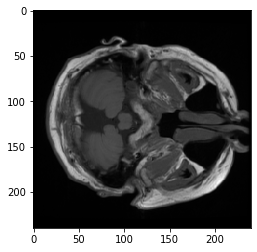

In [19]:
import matplotlib.pyplot as plt
raw.shape
plt.imshow(raw[:,:,21],cmap='gray')

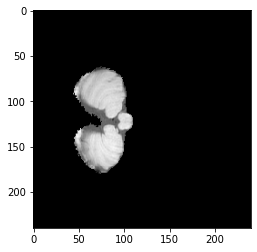

In [20]:
plt.imshow(stripped[:,:,21],cmap='gray')

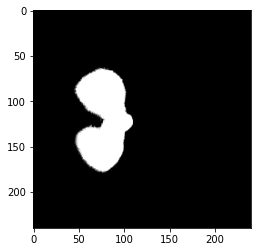

In [21]:
plt.imshow(maskk[:,:,21],cmap='gray')